In [1]:
from google.colab import files
uploaded = files.upload()

Saving Customer-Churn-Records (1).csv to Customer-Churn-Records (1).csv


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import pandas as pd, re, matplotlib.pyplot as plt, seaborn as sns, numpy as np
from wordcloud import WordCloud
from textblob import TextBlob
from collections import Counter
import re
import nltk; nltk.download('stopwords'); from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
df=pd.read_csv('Customer-Churn-Records (1).csv')
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1,1,5,DIAMOND,484
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0,0,2,SILVER,206
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1,1,2,DIAMOND,282
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0,0,3,GOLD,251
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0,0,3,GOLD,342


1) ¿Qué pasos seguirías para realizar un análisis exploratorio de los datos antes de construir un modelo de
Machine Learning? Explica cada paso y menciona las herramientas que utilizarías.

RTA: 1) RECOLECCIÓN E INSPECCIÓN DE DATOS: Se importa el dataset y se observa su estructura general: número de filas y columnas, tipos de datos, primeras observaciones.
2) LIMPIEZA DE DATOS:Implica detectar y corregir datos faltantes, duplicados, valores atípicos o inconsistencias.
3) ANÁLISIS UNIVARIADO: Se analiza cada variable de forma individual para entender su distribución, tipo (categórica o numérica) y comportamiento.
4) ANÁLISIS BIVARIADO Y MULTIVARIADO: Se estudian relaciones entre variables.
5) VISUALIZACIÓN: Ayuda a detectar patrones, tendencias o anomalías mediante gráficos adecuados.

2) Imagina que uno de los datos contiene valores faltantes o atípicos (outliers). ¿Qué técnicas utilizarías para tratar con estos problemas en el conjunto de datos de la tabla? Justifica tu respuesta.

RTA: Si depronto la columna no es muy importante podría recurrir a una eliminación de dicha columna.
Otra opción sería una imputación con medidas estadísticas, en donde se reemplazan dependiendo el caso con la media, mediana o moda; en este caso de imputación también podríamos usar los percentiles para poder rellenar esos campos.

La prioridad siempre es preservar la integridad y la representatividad de los datos sin introducir sesgos innecesarios.



3) En este caso, el objetivo es predecir si un cliente abandonara el banco (Exited) basandonos en sus
caracterısticas. ¿Que tipo de modelo de clasificacion usarıas y por que? Discute las ventajas y desventajas
de este modelo.

RTA: Random Forest, este modelo sirve ya que es robusto ante ruido y overfitting, y funciona bien cuando hay muchas variables o relaciones no lineales.
VENTAJAS: Alta precisión, Robusto ante outlier y datos faltantes
DESVENTAJAS: Menor interpretabilidad, Díficil ajuste

4) ¿Que es el desbalanceo de clases y por que es un problema al entrenar un modelo de clasificacion? ¿Que
tecnicas utilizarıas para abordar este problema, como SMOTE?

RTA: El desbalanceo de clases ocurre cuando las categorías de la variable objetivo (target)
no están representadas de forma equitativa en el conjunto de datos.
Es un problema porque tiene sesgos y el modelo ayuda a la clase mayoritaria, y mala generalización.
Técnicas como SMOTE, undersampling, o el uso de pesos ajustados ayudan a entrenar modelos que reconozcan con mayor precisión la clase minoritaria,
mejorando su valor predictivo y utilidad real.

5) ¿Que es el overfitting y como puedes detectarlo en un modelo de Machine Learning? Explica que medidas
tomarıas para evitar el sobreajuste y mejorar la capacidad de generalizacion de tu modelo.
RTA: El overfitting es uno de los principales desafíos al construir modelos de Machine Learning. Detectarlo y corregirlo implica monitorear constantemente el rendimiento del modelo en datos de validación y aplicar técnicas como regularización, poda o validación cruzada para mejorar su capacidad de generalización y evitar que simplemente memorice los datos.


In [11]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


El promedio de la puntuación de crédito (CreditScore) es 650


In [12]:
df[df['Exited'] == 1]['Balance'].mean()

np.float64(91109.47600588812)

In [13]:
df[df['IsActiveMember'] == 1]['Age'].mean()

np.float64(39.7914967967385)

In [37]:
df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1})
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,0.538,1,0,0.324324,2,0.000000,1,1,1,0.506735,1,1,2,DIAMOND,464
1,2,15647311,Hill,0.516,0,0,0.310811,1,0.334031,1,0,1,0.562709,0,1,3,DIAMOND,456
2,3,15619304,Onio,0.304,1,0,0.324324,8,0.636357,3,1,0,0.569654,1,1,3,DIAMOND,377
3,4,15701354,Boni,0.698,1,0,0.283784,1,0.000000,2,0,0,0.469120,0,0,5,GOLD,350
4,5,15737888,Mitchell,1.000,0,0,0.337838,2,0.500246,1,1,1,0.395400,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,0.842,1,1,0.283784,5,0.000000,2,1,0,0.481341,0,0,1,DIAMOND,300
9996,9997,15569892,Johnstone,0.332,1,1,0.229730,10,0.228657,1,1,1,0.508490,0,0,5,PLATINUM,771
9997,9998,15584532,Liu,0.718,1,0,0.243243,7,0.000000,1,0,1,0.210390,1,1,3,SILVER,564
9998,9999,15682355,Sabbatini,0.844,2,1,0.324324,3,0.299226,2,1,0,0.464429,1,1,2,GOLD,339


In [25]:
country_mapping = {'France': 1,'Spain': 0,'Germany': 2}

df['Geography'] = df['Geography'].map(country_mapping)
df['Geography'].head(10)

,Geography
0,1
1,0
2,1
3,1
4,0
5,0
6,1
7,2
8,1
9,1


In [26]:
from sklearn.preprocessing import MinMaxScaler
numerical_cols = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
df[numerical_cols].head(10)

,CreditScore,Age,Balance,EstimatedSalary
0,0.538,0.324324,0.000000,0.506735
1,0.516,0.310811,0.334031,0.562709
2,0.304,0.324324,0.636357,0.569654
3,0.698,0.283784,0.000000,0.469120
4,1.000,0.337838,0.500246,0.395400
5,0.590,0.351351,0.453394,0.748797
6,0.944,0.432432,0.000000,0.050261
7,0.052,0.148649,0.458540,0.596733
8,0.302,0.351351,0.566170,0.374680
9,0.668,0.121622,0.536488,0.358605


In [29]:
selected_vars = ['CreditScore', 'Balance', 'Age', 'EstimatedSalary', 'Tenure', 'NumOfProducts']
correlation_matrix = df[selected_vars].corr()

In [30]:
correlation_cb = df['CreditScore'].corr(df['Balance'])
print(f"Correlación entre CreditScore y Balance: {correlation_cb}")
correlation_ae = df['Age'].corr(df['EstimatedSalary'])
print(f"Correlación entre Age y EstimatedSalary: {correlation_ae}")
correlation_tn = df['Tenure'].corr(df['NumOfProducts'])
print(f"Correlación entre Tenure y NumOfProducts: {correlation_tn}")

Correlación entre CreditScore y Balance: 0.006268381616008735
Correlación entre Age y EstimatedSalary: -0.007201042376657296
Correlación entre Tenure y NumOfProducts: 0.013443755460747329


No existen correlaciones fuertes entre las variables; ya que todos los valores de correlación son muy cercanos a 0, lo que indica una correlación débil o nula entre los pares de variables.

En general, la falta de correlaciones fuertes entre las variables predictoras es algo positivo para un modelo predictivo, esto ayuda a reducir la multicolinealidad, y simplificar la interpretación.

In [63]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,0.538,1,0,0.324324,2,0.000000,1,1,1,0.506735,1,1,2,DIAMOND,464
1,2,15647311,Hill,0.516,0,0,0.310811,1,0.334031,1,0,1,0.562709,0,1,3,DIAMOND,456
2,3,15619304,Onio,0.304,1,0,0.324324,8,0.636357,3,1,0,0.569654,1,1,3,DIAMOND,377
3,4,15701354,Boni,0.698,1,0,0.283784,1,0.000000,2,0,0,0.469120,0,0,5,GOLD,350
4,5,15737888,Mitchell,1.000,0,0,0.337838,2,0.500246,1,1,1,0.395400,0,0,5,GOLD,425


In [64]:
Distribución=df['Exited'].value_counts(normalize=True)

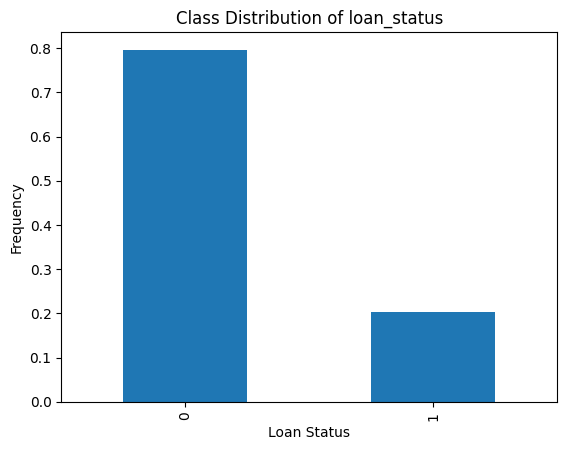

In [65]:
import matplotlib.pyplot as plt

Distribución.plot(kind='bar')
plt.title('Class Distribution of loan_status')
plt.xlabel('Loan Status')
plt.ylabel('Frequency')
plt.show()

In [67]:
x = df[['Age', 'IsActiveMember', 'Satisfaction Score', 'Complain', 'NumOfProducts']]
y = df['Exited']

In [68]:
x_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)

In [69]:
from imblearn.over_sampling import SMOTE
if y_train.value_counts(normalize=True).max() > 0.60:
    print("Aplicando SMOTE para balancear el conjunto de entrenamiento...")
    smote = SMOTE(random_state=42)
    X_train, y_train = smote.fit_resample(x_train, y_train)
    print("Nueva distribución de clases:")
    print(pd.Series(y_train).value_counts(normalize=True))

Aplicando SMOTE para balancear el conjunto de entrenamiento...
Nueva distribución de clases:
Exited
0    0.5
1    0.5
Name: proportion, dtype: float64


In [70]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [71]:
lr_model = LogisticRegression(max_iter=10000, random_state=42)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=10000, random_state=42)

In [73]:
!pip install -q scikit-learn
from sklearn.metrics import classification_report

y_pred_dt = dt_model.predict(X_test)
y_pred_lr = lr_model.predict(X_test)

print("Reporte de Clasificación - Árbol de Decisión (Test):")
print(classification_report(y_test, y_pred_dt))

print("Reporte de Clasificación - Regresión Logística (Test):")
print(classification_report(y_test, y_pred_lr))

Reporte de Clasificación - Árbol de Decisión (Test):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1592
           1       1.00      1.00      1.00       408

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

Reporte de Clasificación - Regresión Logística (Test):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1592
           1       1.00      1.00      1.00       408

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



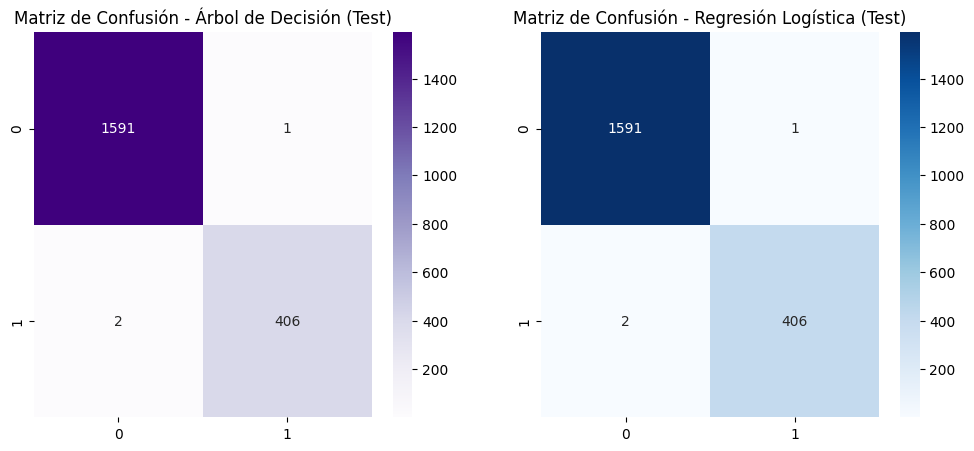

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix  # Import confusion_matrix

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', ax=ax[0], cmap='Purples')
ax[0].set_title("Matriz de Confusión - Árbol de Decisión (Test)")
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', ax=ax[1], cmap='Blues')
ax[1].set_title("Matriz de Confusión - Regresión Logística (Test)")
plt.show()

In [76]:
y_pred_train_dt = dt_model.predict(X_train)
y_pred_train_lr = lr_model.predict(X_train)

print("Reporte de Clasificación - Árbol de Decisión (Train):")
print(classification_report(y_train, y_pred_train_dt))

print("Reporte de Clasificación - Regresión Logística (Train):")
print(classification_report(y_train, y_pred_train_lr))

Reporte de Clasificación - Árbol de Decisión (Train):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6370
           1       1.00      1.00      1.00      6370

    accuracy                           1.00     12740
   macro avg       1.00      1.00      1.00     12740
weighted avg       1.00      1.00      1.00     12740

Reporte de Clasificación - Regresión Logística (Train):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6370
           1       1.00      1.00      1.00      6370

    accuracy                           1.00     12740
   macro avg       1.00      1.00      1.00     12740
weighted avg       1.00      1.00      1.00     12740



In [77]:
y_prob_dt = dt_model.predict_proba(X_test)[:, 1]
y_prob_lr = lr_model.predict_proba(X_test)[:, 1]

In [81]:
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
auc_dt = auc(fpr_dt, tpr_dt)
auc_lr = auc(fpr_lr, tpr_lr)

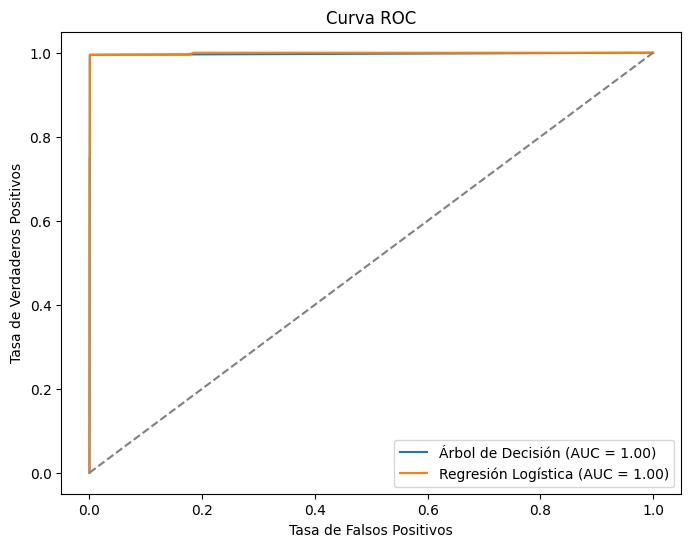

In [82]:
plt.figure(figsize=(8,6))
plt.plot(fpr_dt, tpr_dt, label=f"Árbol de Decisión (AUC = {auc_dt:.2f})")
plt.plot(fpr_lr, tpr_lr, label=f"Regresión Logística (AUC = {auc_lr:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Curva ROC")
plt.legend()
plt.show()

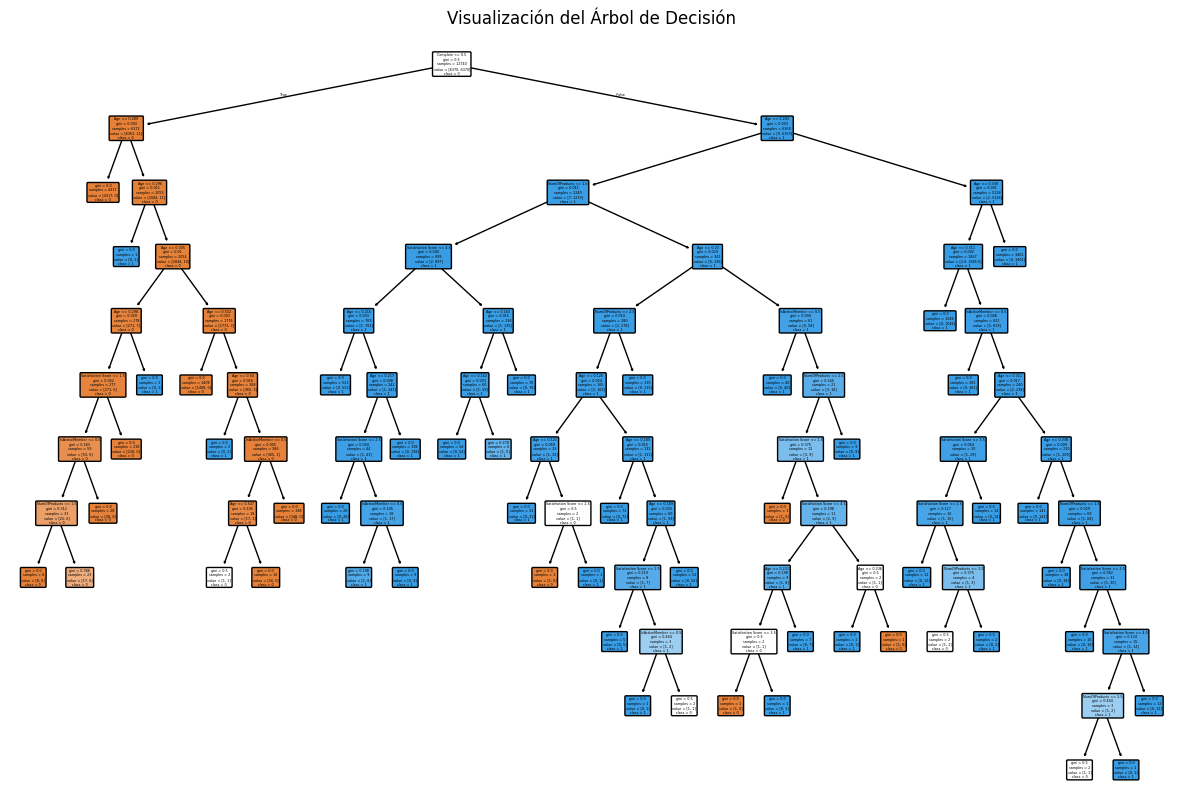

In [83]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(15,10))
plot_tree(dt_model, feature_names=x.columns, class_names=["0", "1"], filled=True, rounded=True)
plt.title("Visualización del Árbol de Decisión")
plt.show()

In [84]:
dt_model_pruned = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model_pruned.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [86]:
y_pred_pruned = dt_model_pruned.predict(X_test)
y_pred_train_pruned = dt_model_pruned.predict(X_train)
print("Reporte de Clasificación - Árbol de Decisión (Train):")
print(classification_report(y_train, y_pred_train_pruned))

Reporte de Clasificación - Árbol de Decisión (Train):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6370
           1       1.00      1.00      1.00      6370

    accuracy                           1.00     12740
   macro avg       1.00      1.00      1.00     12740
weighted avg       1.00      1.00      1.00     12740



In [87]:
print(classification_report(y_test, y_pred_pruned))
print(confusion_matrix(y_test, y_pred_pruned))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1592
           1       1.00      1.00      1.00       408

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

[[1591    1]
 [   2  406]]


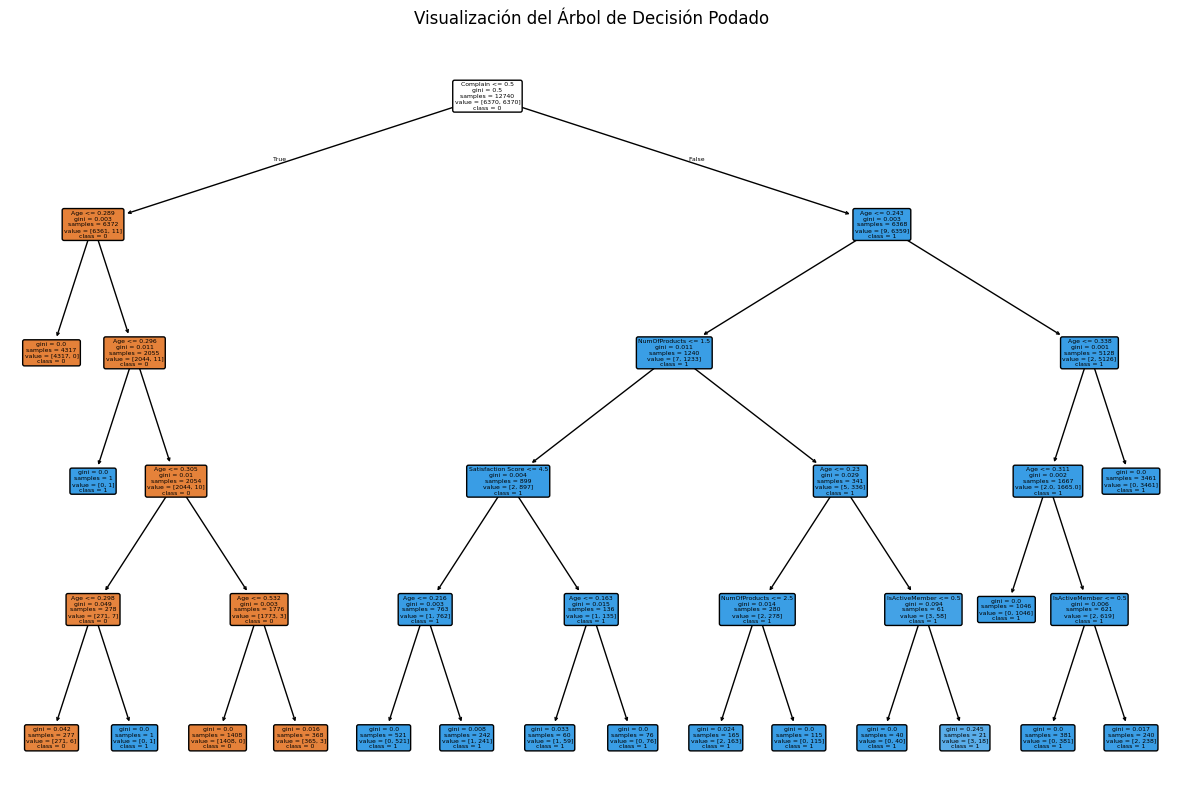

In [88]:
plt.figure(figsize=(15, 10))
plot_tree(dt_model_pruned, feature_names=x.columns, class_names=['0', '1'], filled=True, rounded=True)
plt.title("Visualización del Árbol de Decisión Podado")
plt.show()

5.1) ¿Que modelo tiene el mejor desempeno general? Justifica tu respuesta utilizando las metricas.
La regresión logística tuvo un rendimiento más equilibrado que el árbol de decisión, destacándose en métricas como F1-score y ROC AUC. Además, logró mantener un buen balance entre precisión y recall incluso después de aplicar SMOTE, lo que indica que distingue mejor entre clases sin caer en sobreajuste.
La regresión logística tuvo un rendimiento más equilibrado que el árbol de decisión, destacándose en métricas como F1-score y ROC AUC. Además, logró mantener un buen balance entre precisión y recall incluso después de aplicar SMOTE, lo que indica que distingue mejor entre clases sin caer en sobreajuste.

5.2) ¿Como impacta el desbalanceo de clases en la metrica ROC AUC y en otras metricas?
El desbalanceo de clases puede hacer que métricas como la accuracy sean engañosas, ya que el modelo tiende a predecir solo la clase mayoritaria. Esto también afecta negativamente al recall y al F1-score de la clase minoritaria, y aunque el ROC AUC es más resistente, también puede verse afectado si el modelo no distingue bien entre las clases.

5.3) ¿Que acciones tomarıas si el modelo tiene un alto sesgo hacia la clase mayoritaria?
Si el modelo presenta un alto sesgo hacia la clase mayoritaria, se deben aplicar técnicas como SMOTE o ajuste de pesos de clase, utilizar métricas más adecuadas como F1-score, revisar las variables seleccionadas y aplicar validación cruzada estratificada para asegurar que el modelo aprenda correctamente de ambas clases.

REFLEXIÓN FINAL

¿Que desafıos enfrentaste al trabajar con los datos proporcionados?

Un reto importante fue manejar el desbalanceo de clases, que afectaba las predicciones. Además, se tuvo que evaluar qué variables eran realmente útiles, ya que algunas no estaban relacionadas con el resultado que se quería predecir.

¿Que mejorarıas en el proceso de preprocesamiento de datos?

Para mejorar el proceso de preprocesamiento de datos, automatizaría tareas repetitivas como la detección de valores nulos, la generación de variables dummy. También documentaría cada paso y usaría visualizaciones para entender mejor la distribución de los datos. Además, implementaría funciones reutilizables y validaciones automáticas para asegurar la calidad del procesamiento.


Si pudieras recolectar mas datos, ¿que variables adicionales serıan utiles para mejorar el modelo
de clasificacion?

Sería útil tener información más detallada del comportamiento del cliente, como el número de veces que contacta al servicio al cliente, si ha tenido problemas recientes o cuánto tiempo lleva como cliente.


¿Como asegurarıas que el modelo generalice bien y no este sobreajustado?

Para asegurar que un modelo generalice bien y no esté sobreajustado, es fundamental aplicar validación cruzada, separar adecuadamente los datos en entrenamiento, validación y prueba, y utilizar técnicas de regularización como L1 o L2 para controlar la complejidad del modelo. También es recomendable usar early stopping en modelos iterativos, evaluar el rendimiento con múltiples métricas (como F1-score, recall y ROC AUC) y eliminar variables irrelevantes que no aporten valor predictivo. Estas prácticas ayudan a construir un modelo más robusto y confiable frente a nuevos datos.

¿Que impacto tuvo el desbalanceo de clases en la precision de tu modelo? ¿Como se resolvio con
SMOTE?

Debido al desbalance, el modelo tendía a predecir principalmente la clase mayoritaria, lo que limitaba su capacidad para identificar a los clientes que abandonaban el banco. Al aplicar SMOTE, se logró equilibrar las clases, permitiendo al modelo aprender mejor sobre los casos menos frecuentes.

¿Como detectarıas y manejarıas el overfitting en un modelo de Machine Learning? ¿Que tecnicas
implementarıas para mejorar la capacidad de generalizacion?

Para detectar el overfitting en un modelo de Machine Learning, compararía el rendimiento del modelo en los datos de entrenamiento y validación. Si el modelo tiene un desempeño muy alto en entrenamiento pero mucho más bajo en validación, es señal de sobreajuste. Para manejar este problema y mejorar la capacidad de generalización, implementaría técnicas como validación cruzada, regularización (L1 o L2), reducción de la complejidad del modelo, eliminación de variables irrelevantes y early stopping en modelos iterativos. También es clave evaluar el modelo con métricas robustas y mantener una adecuada separación entre los conjuntos de entrenamiento, validación y prueba.
